In [0]:
import numpy as np

def S_dot_f(sir, beta):
    return - beta * sir[0] * sir[1]

def I_dot_f(sir, alpha, beta):
    return beta * sir[0] * sir[1] - alpha * sir[1]

def R_dot_f(sir, alpha):
    return alpha * sir[1]

def sir_dot_f(sir, alpha, beta):
    S_dot = S_dot_f(sir, beta)
    I_dot = I_dot_f(sir, alpha, beta)
    R_dot = R_dot_f(sir, alpha)
    return np.asarray([S_dot, I_dot, R_dot])

def evolve_timestep(sir, alpha, beta):
    return sir + sir_dot_f(sir, alpha, beta)

In [0]:
N = 100
S0 = 95
I0 = N - S0
R0 = 0
sir = np.asarray([S0, I0, R0])

alpha = 0.003 # prob that an infected guy recovers or dies
beta = 0.002 # rate of infection per infected and per susceptible

total_timesteps = 1000
evolution = np.zeros((total_timesteps, len(sir)))
evolution[0] = sir

for i in range(1, total_timesteps):
    sir = evolve_timestep(sir, alpha, beta)
    evolution[i] = sir

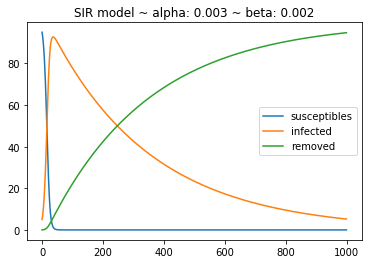

In [33]:
import matplotlib.pyplot as plt

plt.plot(evolution)
plt.title('SIR model ~ alpha: {} ~ beta: {}'.format(alpha, beta))
plt.legend(['susceptibles', 'infected', 'removed'])
plt.show()